# Prime distribution

In [ ]:
date; pwd
# Sat Oct 20 20:34:15 EDT 2018
# /Users/cchiang/research/math/prime

Primecount available at: https://github.com/kimwalisch/primecount

Runtime is too slow, let's just download the data from: https://oeis.org/A006880

In [2]:
setwd('/Users/cchiang/research/math/prime')

In [1]:
library("RcppAlgos")

##### Define functions

In [90]:
# basic prime number theorem
logratio <- function(x) {x/log(x)}

# Gauss's idea that density of primes around n is 1/log(n)
intgnd <- function(x) {1/log(x)}
li <- function(x) {integrate(intgnd,1+1e-9,x)$value}

# Direchlet suggested offset by log(2). i.e.: li(x) - li(2)
Li <- function(x) {integrate(intgnd,2,x)$value}

##### Primes up to 500

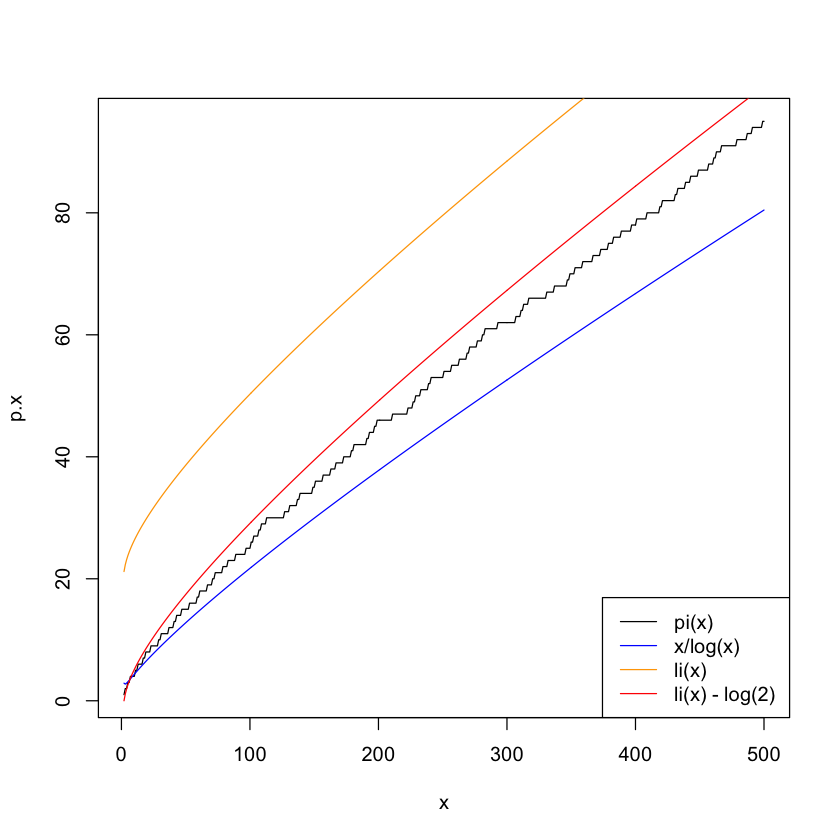

In [144]:
nmax <- 500

x <- round(seq(2, nmax, length=500), 0)
p.x <- lapply(x, FUN = primeCount)

plot(x, p.x, type='l')
points(x, logratio(x), type='l', col='blue')
points(x, lapply(x, FUN = li), type='l', col='orange')
points(x, lapply(x, FUN = Li), type='l', col='red')
legend('bottomright', c('pi(x)', 'x/log(x)', 'li(x)', 'li(x) - log(2)'), col=c('black', 'blue', 'orange', 'red'), lty=1)

##### Primes up to 10,000

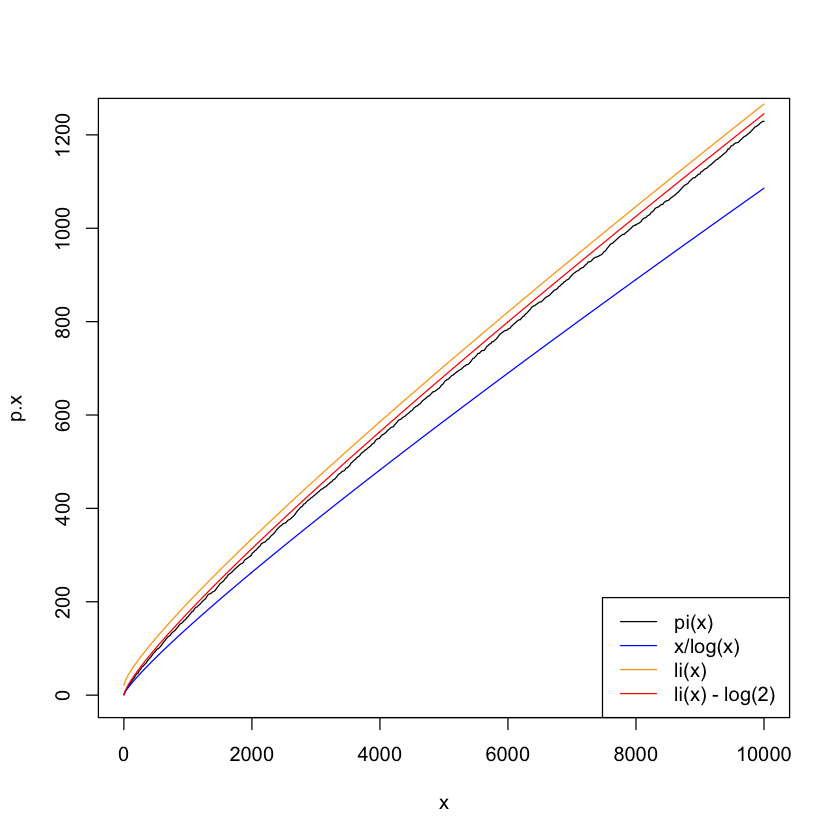

In [94]:
nmax <- 1e4

x <- round(seq(2, nmax, length=500), 0)
p.x <- lapply(x, FUN = primeCount)

plot(x, p.x, type='l')
points(x, logratio(x), type='l', col='blue')
points(x, lapply(x, FUN = li), type='l', col='orange')
points(x, lapply(x, FUN = Li), type='l', col='red')
legend('bottomright', c('pi(x)', 'x/log(x)', 'li(x)', 'li(x) - log(2)'), col=c('black', 'blue', 'orange', 'red'), lty=1)

Residual differences between Li(x) and pi(x)

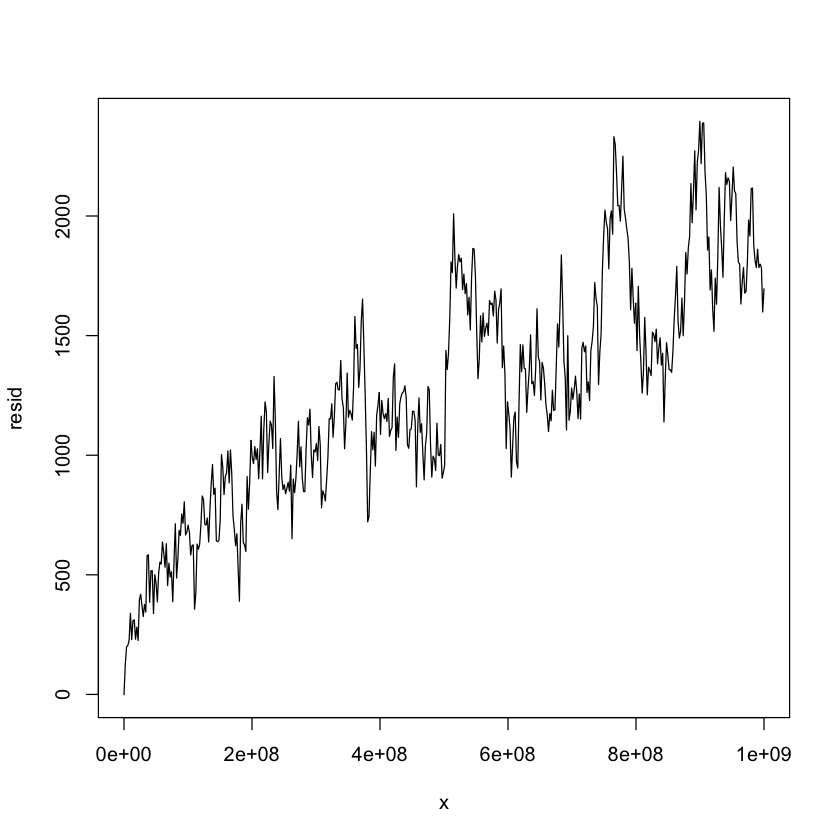

In [129]:
nmax <- 1e9
x <- round(seq(2, nmax, length=500), 0)
p.x <- lapply(x, FUN = primeCount)
est <- lapply(x, FUN = Li)

resid <- mapply('-', est, p.x, SIMPLIFY=FALSE)

plot(x, resid, type='l')